In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
df_train.head()
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [50]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [51]:
missing_values = df_train.isnull().sum()
print("Missing values in training data:")
print(missing_values[missing_values > 0])

Missing values in training data:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [17]:
for col in df_train.select_dtypes(include=[np.number]).columns:
    df_train[col] = df_train[col].fillna(df_train[col].median())

for col in df_train.select_dtypes(include=[object]).columns:
    df_train[col] = df_train[col].fillna('Unknown')

missing_values = df_train.isnull().sum()
print("Missing values after handling:")
print(missing_values[missing_values > 0])

Missing values after handling:
Series([], dtype: int64)


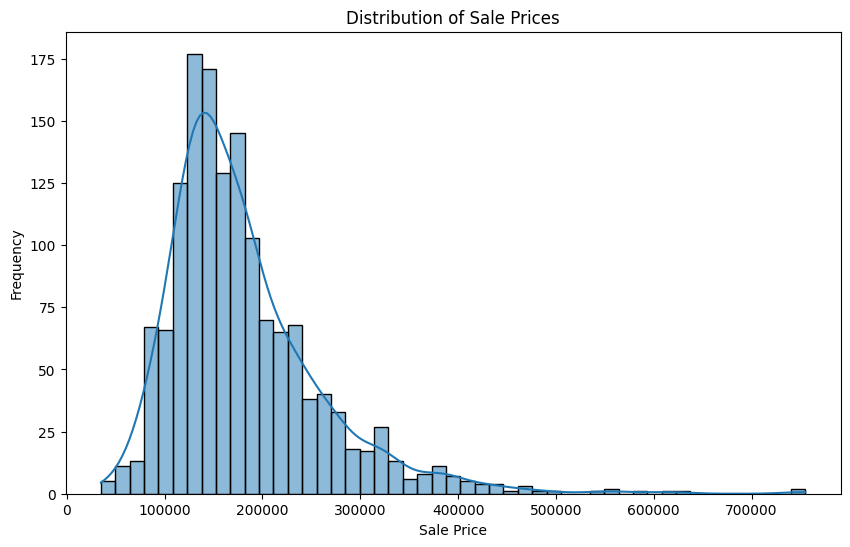

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_train['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

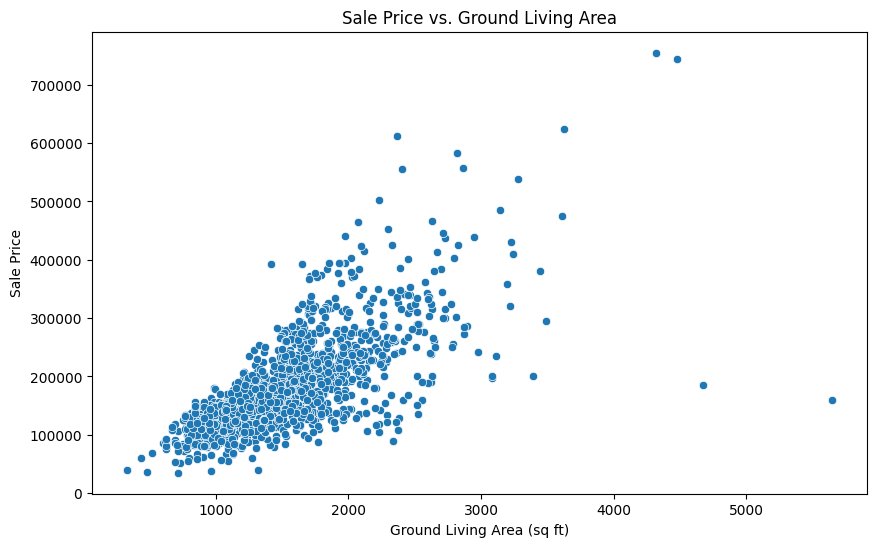

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'])
plt.title('Sale Price vs. Ground Living Area')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

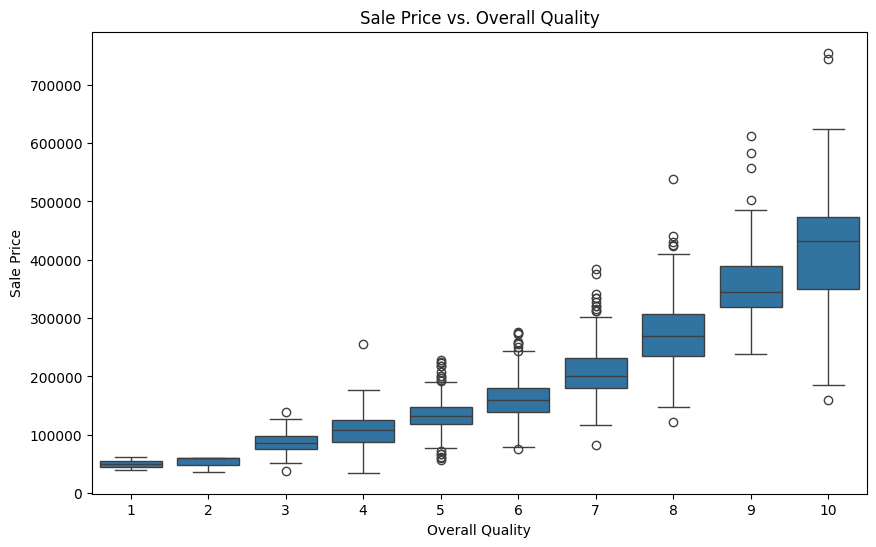

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['OverallQual'], y=df_train['SalePrice'])
plt.title('Sale Price vs. Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

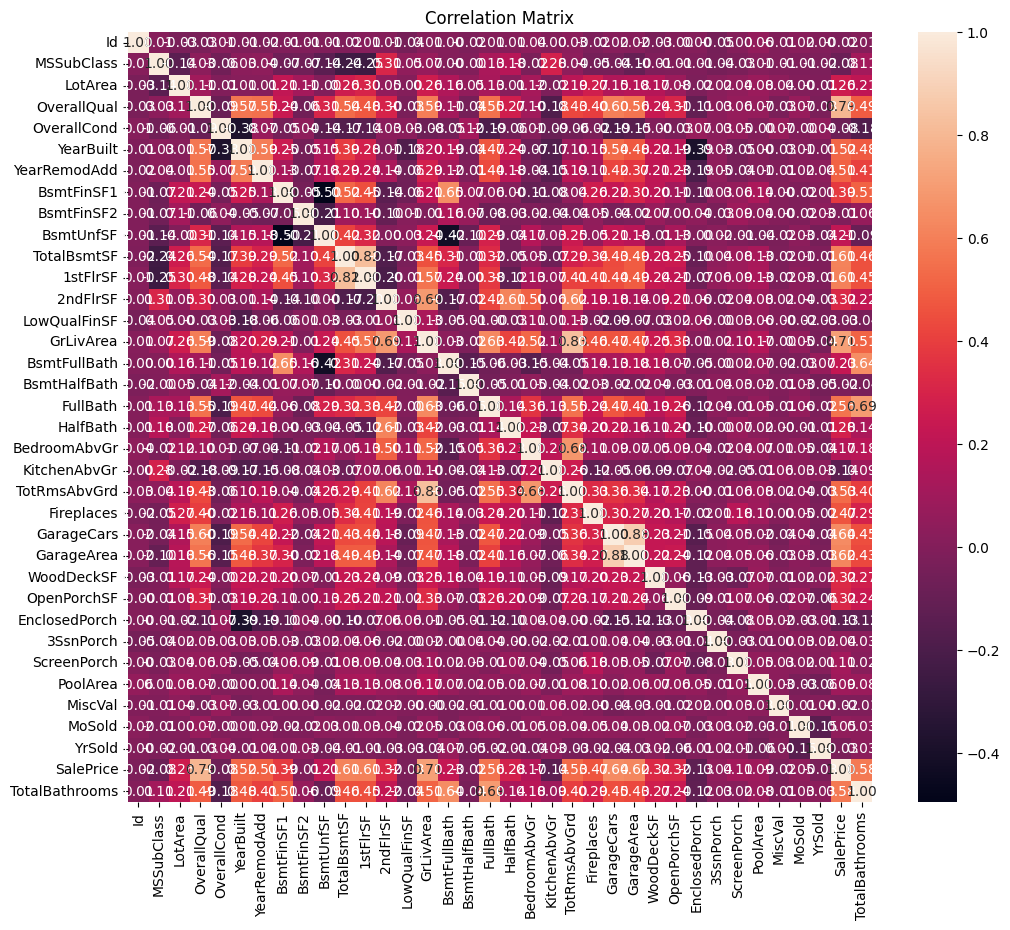

In [45]:
int_columns = df_train.select_dtypes(include=['int64', 'int32']).columns
df_train=df_train[int_columns]

df_train['TotalBathrooms'] =(1.0*df_train['FullBath']) + (0.5 * df_train['HalfBath']) +(1.0*df_train['BsmtFullBath']) + (0.5 * df_train['BsmtHalfBath'])
df_train['TotalBathrooms'] = df_train['TotalBathrooms'].astype(int)

corr_matrix = df_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

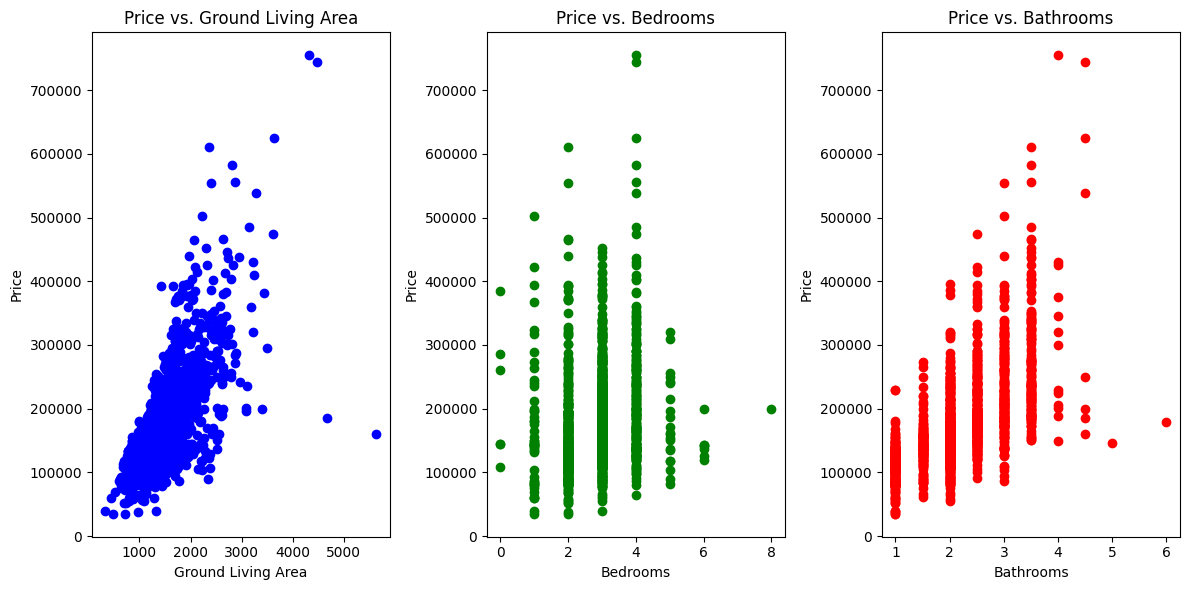

In [37]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'], color='blue')
plt.xlabel('Ground Living Area')
plt.ylabel('Price')
plt.title('Price vs. Ground Living Area')

plt.subplot(1, 3, 2)
plt.scatter(df_train['BedroomAbvGr'], df_train['SalePrice'], color='green')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price vs. Bedrooms')

plt.subplot(1, 3, 3)
plt.scatter(df_train['TotalBathrooms'], df_train['SalePrice'], color='red')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price vs. Bathrooms')

plt.tight_layout()
plt.show()

In [41]:
missing_values = df_test.isnull().sum()
print("Missing values in testing data:")
print(missing_values[missing_values > 0])

for col in df_test.select_dtypes(include=[np.number]).columns:
    df_test[col] = df_test[col].fillna(df_test[col].median())

for col in df_test.select_dtypes(include=[object]).columns:
    df_test[col] = df_test[col].fillna('Unknown')

missing_values = df_test.isnull().sum()
print("Missing values after handling:")
print(missing_values[missing_values > 0])

Missing values in testing data:
MSZoning             4
LotFrontage        227
Alley             1352
Utilities            2
Exterior1st          1
Exterior2nd          1
MasVnrType         894
MasVnrArea          15
BsmtQual            44
BsmtCond            45
BsmtExposure        44
BsmtFinType1        42
BsmtFinSF1           1
BsmtFinType2        42
BsmtFinSF2           1
BsmtUnfSF            1
TotalBsmtSF          1
BsmtFullBath         2
BsmtHalfBath         2
KitchenQual          1
Functional           2
FireplaceQu        730
GarageType          76
GarageYrBlt         78
GarageFinish        78
GarageCars           1
GarageArea           1
GarageQual          78
GarageCond          78
PoolQC            1456
Fence             1169
MiscFeature       1408
SaleType             1
TotalBathrooms       2
dtype: int64
Missing values after handling:
Series([], dtype: int64)


In [46]:
X_train = df_train[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']]
y_train = df_train['SalePrice']

df_test['TotalBathrooms'] =(1.0*df_test['FullBath']) + (0.5 * df_test['HalfBath']) +(1.0*df_test['BsmtFullBath']) + (0.5 * df_test['BsmtHalfBath'])
df_test['TotalBathrooms'] = df_test['TotalBathrooms'].astype(int)
X_test = df_test[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']]

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
df_test['Predicted_Price'] = predictions

for index, row in df_test.iterrows():
    print(f"Input:\n {row[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']]}, Predicted Price: {row['Predicted_Price']}\n\n")


Streaming output truncated to the last 5000 lines.


Input:
 GrLivArea         1091
BedroomAbvGr         2
TotalBathrooms       1
Name: 745, dtype: object, Predicted Price: 127199.9151447189


Input:
 GrLivArea         1873
BedroomAbvGr         4
TotalBathrooms       1
Name: 746, dtype: object, Predicted Price: 161863.31809146327


Input:
 GrLivArea         2161
BedroomAbvGr         3
TotalBathrooms       3
Name: 747, dtype: object, Predicted Price: 274670.86995639245


Input:
 GrLivArea         1898
BedroomAbvGr         3
TotalBathrooms       2
Name: 748, dtype: object, Predicted Price: 217668.60999425952


Input:
 GrLivArea         1032
BedroomAbvGr         2
TotalBathrooms       1
Name: 749, dtype: object, Predicted Price: 120978.0244817902


Input:
 GrLivArea         919
BedroomAbvGr        2
TotalBathrooms      2
Name: 750, dtype: object, Predicted Price: 138328.913439496


Input:
 GrLivArea         1090
BedroomAbvGr         3
TotalBathrooms       1
Name: 751, dtype: object, Predi